In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import association

In [80]:
data = pd.read_csv("data/train.csv")
data = data.drop("PassengerId", axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [81]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
categorical = data[["Sex", "Embarked", "Pclass", "Survived"]] # Still not using columns Name, Ticket, Cabin.

numerical = data.select_dtypes(exclude=['object'])
numerical.drop(["Pclass", "Survived"] , axis=1, inplace=True)

categorical.columns, numerical.columns

(Index(['Sex', 'Embarked', 'Pclass', 'Survived'], dtype='object'),
 Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))

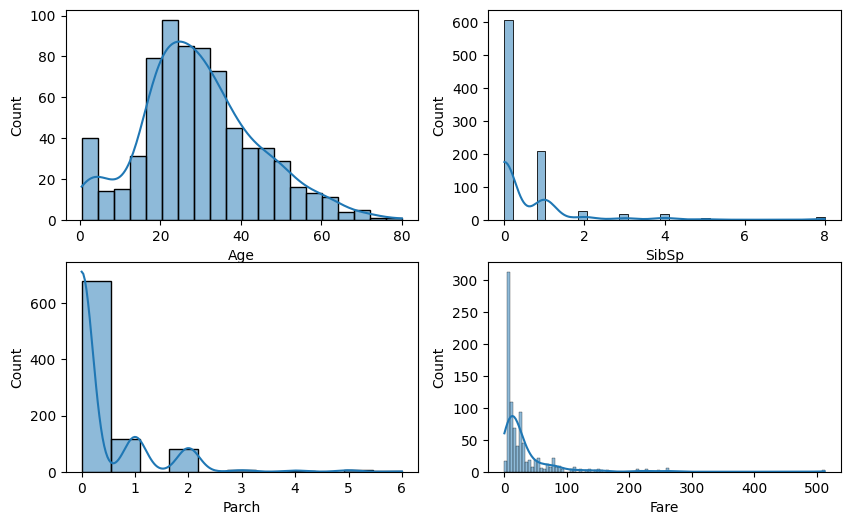

In [127]:
# Distribution of numerical variables.

num_plots = len(numerical.columns)
rows = (num_plots + 1) // 2
fig, ax = plt.subplots(rows, 2, figsize=(10, 3 * rows))
ax = ax.flatten()

for i, col in enumerate(numerical.columns):
    sns.histplot(numerical[col], ax=ax[i], kde=True)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])


We observe that the *Age* feature follows a fairly normal distribution. In contrast, the other features are skewed, with values concentrated at the lower end and a long tail extending toward higher values.

<Axes: >

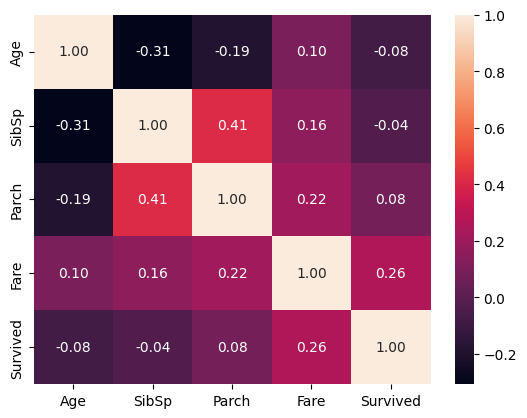

In [ ]:
# Correlation between numerical variables and survival.

numerical["Survived"] = data["Survived"]
sns.heatmap(numerical.corr(), annot=True, fmt=".2f")

There is a moderate correlation between *SibSp* and *Parch*, revealing the behavior of people travelling in family. This correlation should not be big enough to cause problems in the classification model.

We also observe a correlation between the *Fare* and the survivability, which may indicate that passengers that payed higher fares had a higher survival.

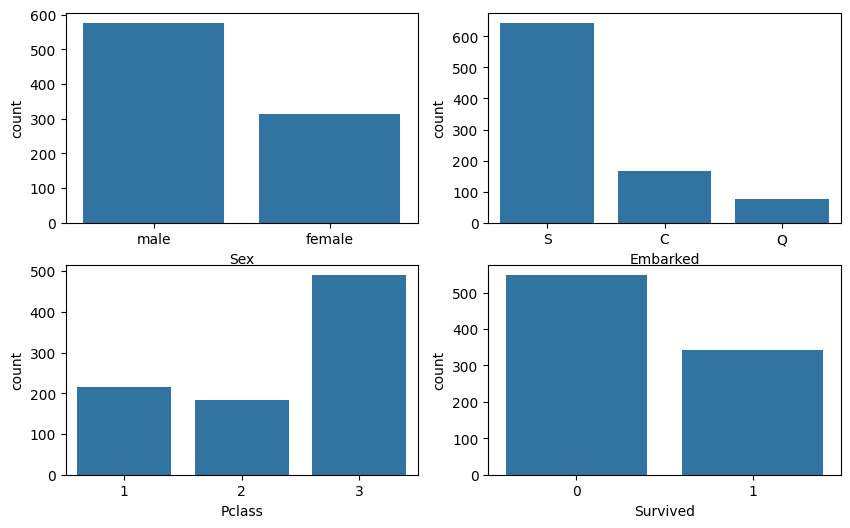

In [129]:
num_plots = len(categorical.columns)

rows = (num_plots + 1) // 2
fig, ax = plt.subplots(rows, 2, figsize=(10, 3 * rows))
ax = ax.flatten()

for i, col in enumerate(categorical.columns):
    sns.countplot(x=col, data=categorical, ax=ax[i])

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

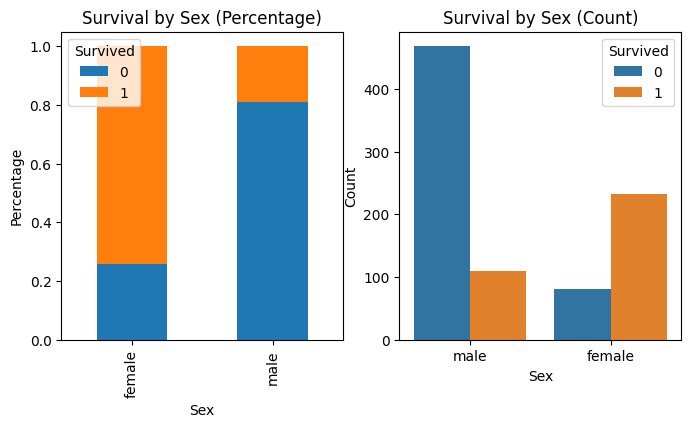

The correlation between Sex and survival is: 0.5433513806577551


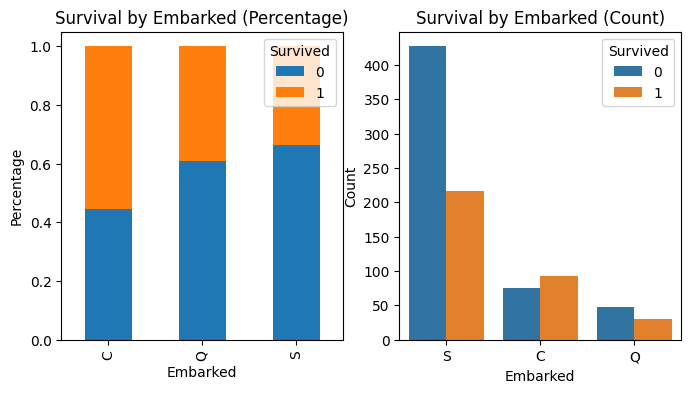

The correlation between Embarked and survival is: 0.17261682709984438


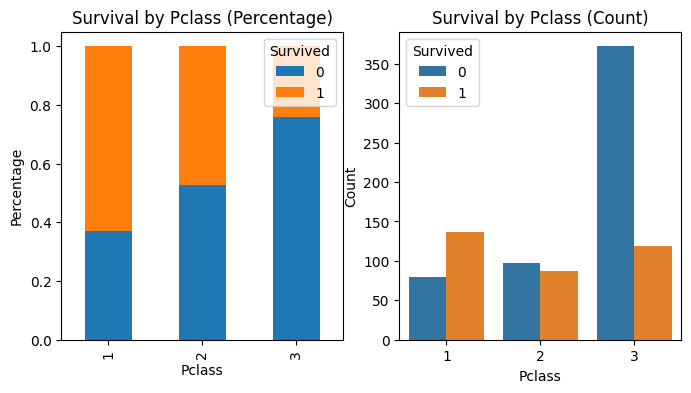

The correlation between Pclass and survival is: 0.33981738800531175


In [131]:
for i, col in enumerate(categorical.columns):
    if col == "Survived":
        continue

    crosstab = pd.crosstab(categorical[col], categorical["Survived"])
    percentages = crosstab.div(crosstab.sum(1), axis=0)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax = ax.flatten()

    percentages.plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title(f"Survival by {col} (Percentage)")
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Percentage")

    sns.countplot(x=col, hue="Survived", data=categorical, ax=ax[1])
    ax[1].set_title(f"Survival by {col} (Count)")
    ax[1].set_ylabel("Count")
    plt.show()

    correlation = association(crosstab)
    print(f"The correlation between {col} and survival is: {correlation}")

In [128]:
pd.unique(data["Name"]).shape[0] == data.shape[0]

True

Each row corresponds to a different person.

In [ ]:
pd.unique(data["Cabin"])

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Some passengers have more than one cabin.